## Employee Attrition prediction

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [305]:
df = pd.read_csv("/content/drive/MyDrive/Projects ME/WA_Fn-UseC_-HR-Employee-Attrition.csv")\


In [306]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [307]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [308]:
## there are no null values in the Data

In [309]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [311]:
n_d = df.select_dtypes(exclude=object)

In [312]:
n_d.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [313]:
c_d = df.select_dtypes(include=object)

In [314]:
c_d.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [315]:
import warnings
warnings.filterwarnings('ignore')


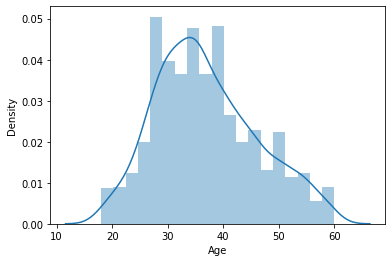

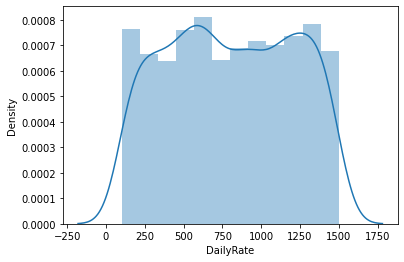

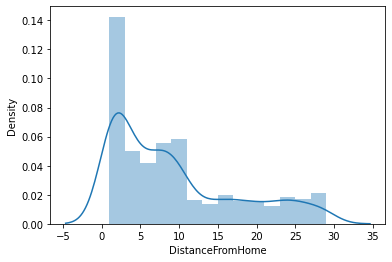

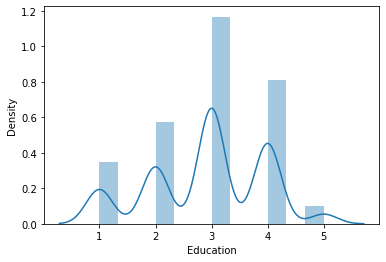

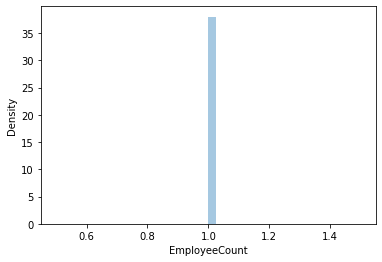

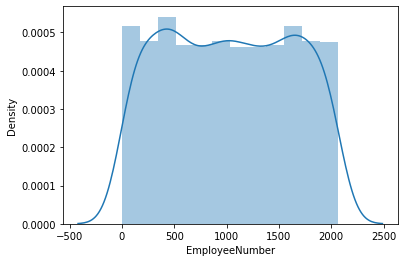

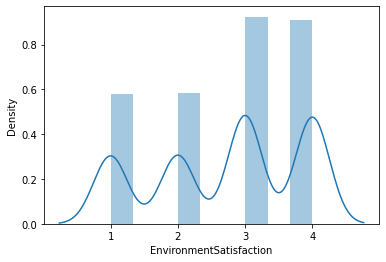

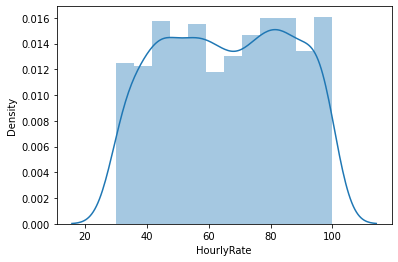

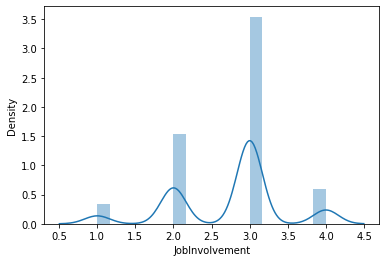

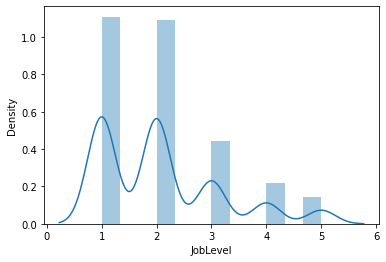

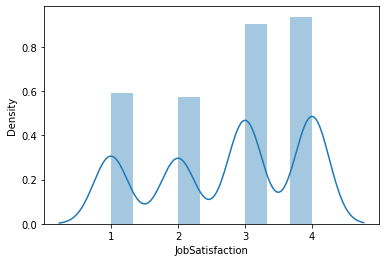

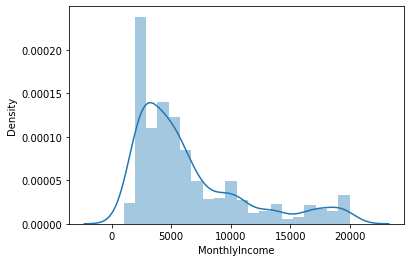

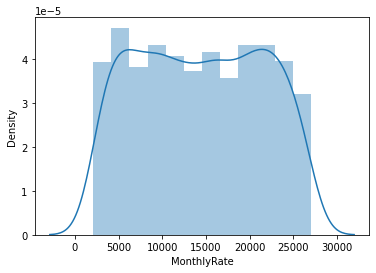

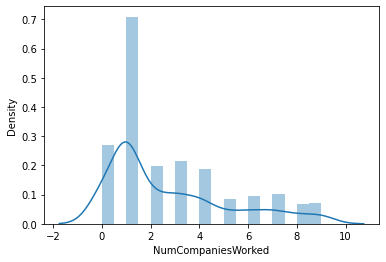

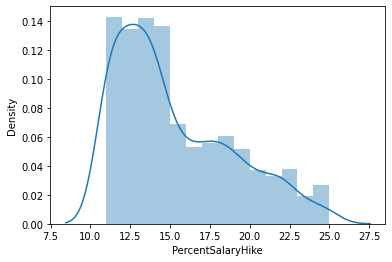

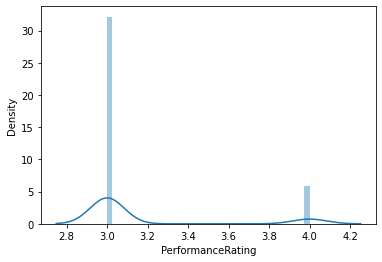

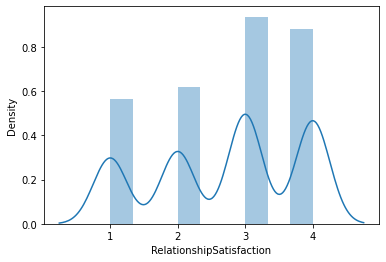

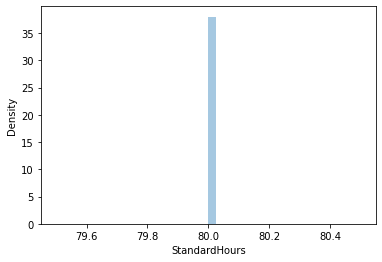

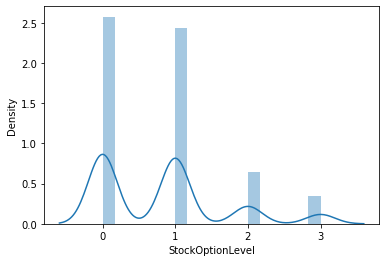

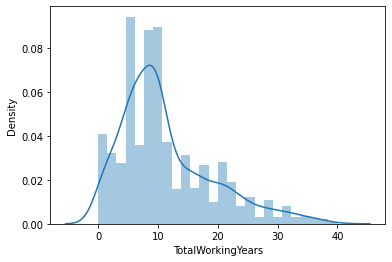

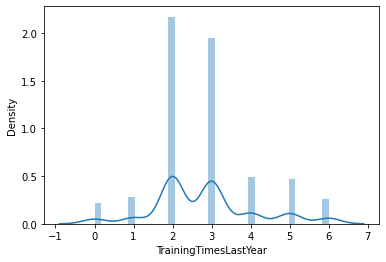

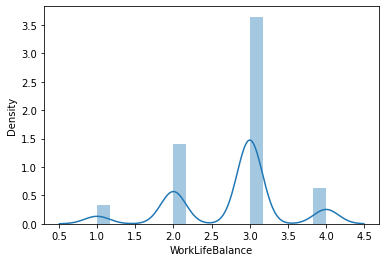

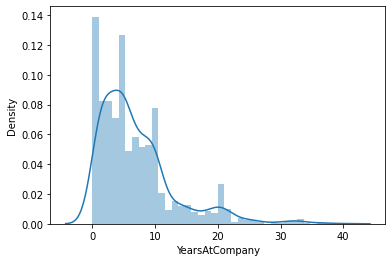

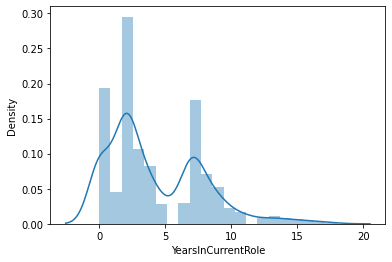

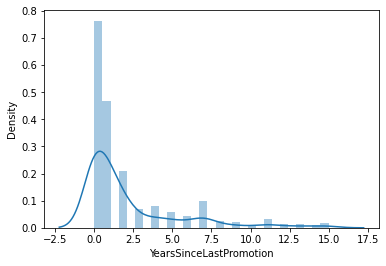

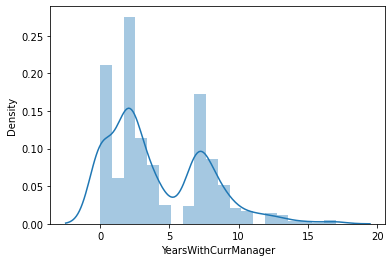

In [316]:
# checking the data whether it is normal distributed or not using distplot
import seaborn as sns
a1 = n_d.columns
for i in a1:
  sns.distplot(n_d[i])
  plt.show()

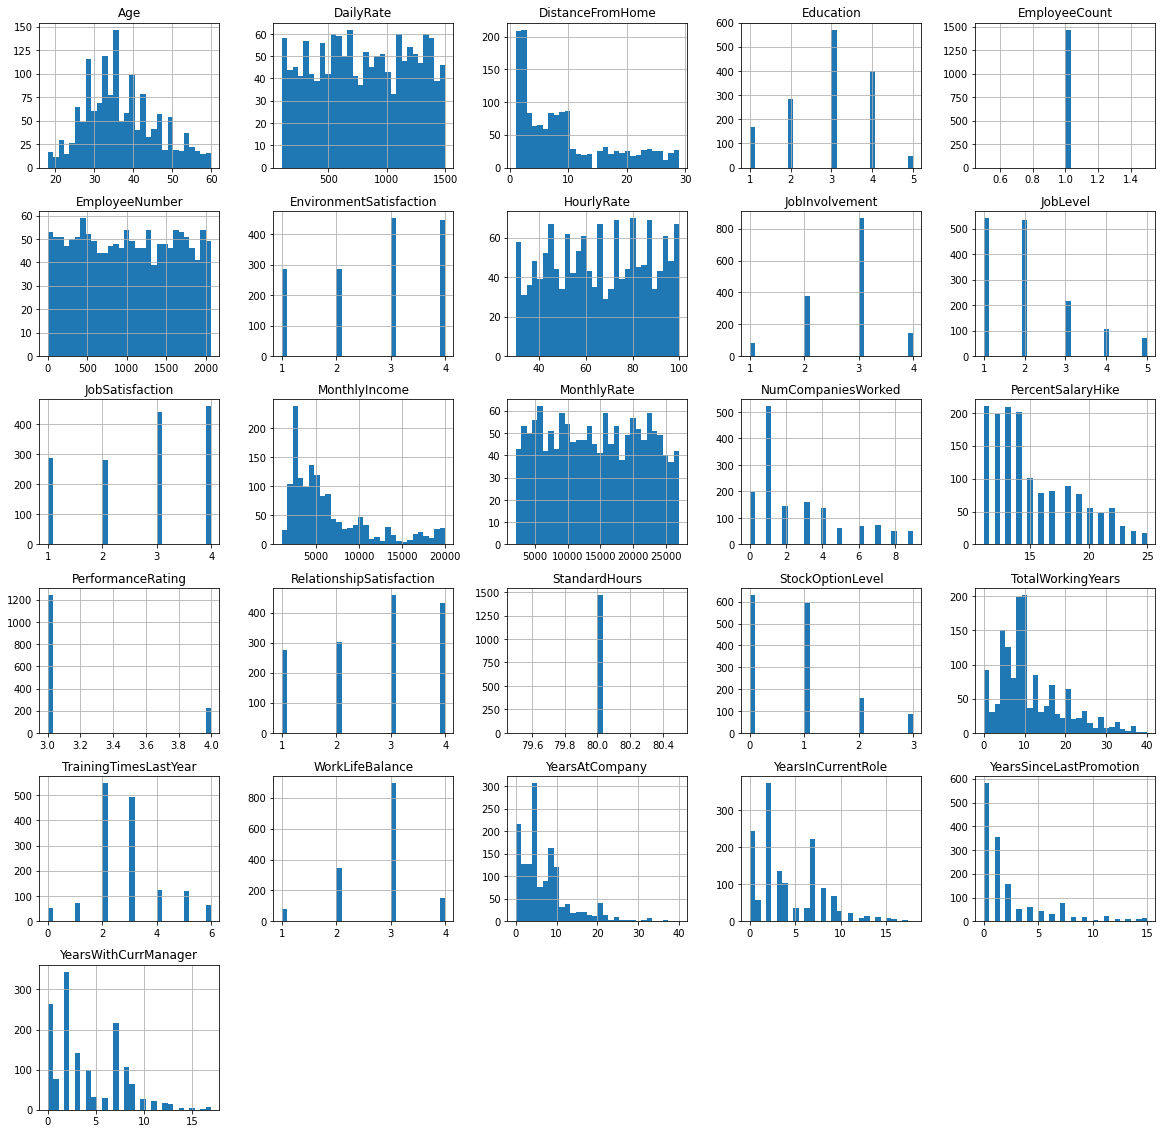

In [317]:
# checking the data whether it is normal distributed or not using histogram

a = n_d.hist(figsize=(20,20),bins=30)

In [318]:
n_d.drop(['EmployeeCount'],axis=1,inplace=True)

In [319]:
n_d.drop(['StandardHours'],axis=1,inplace=True)

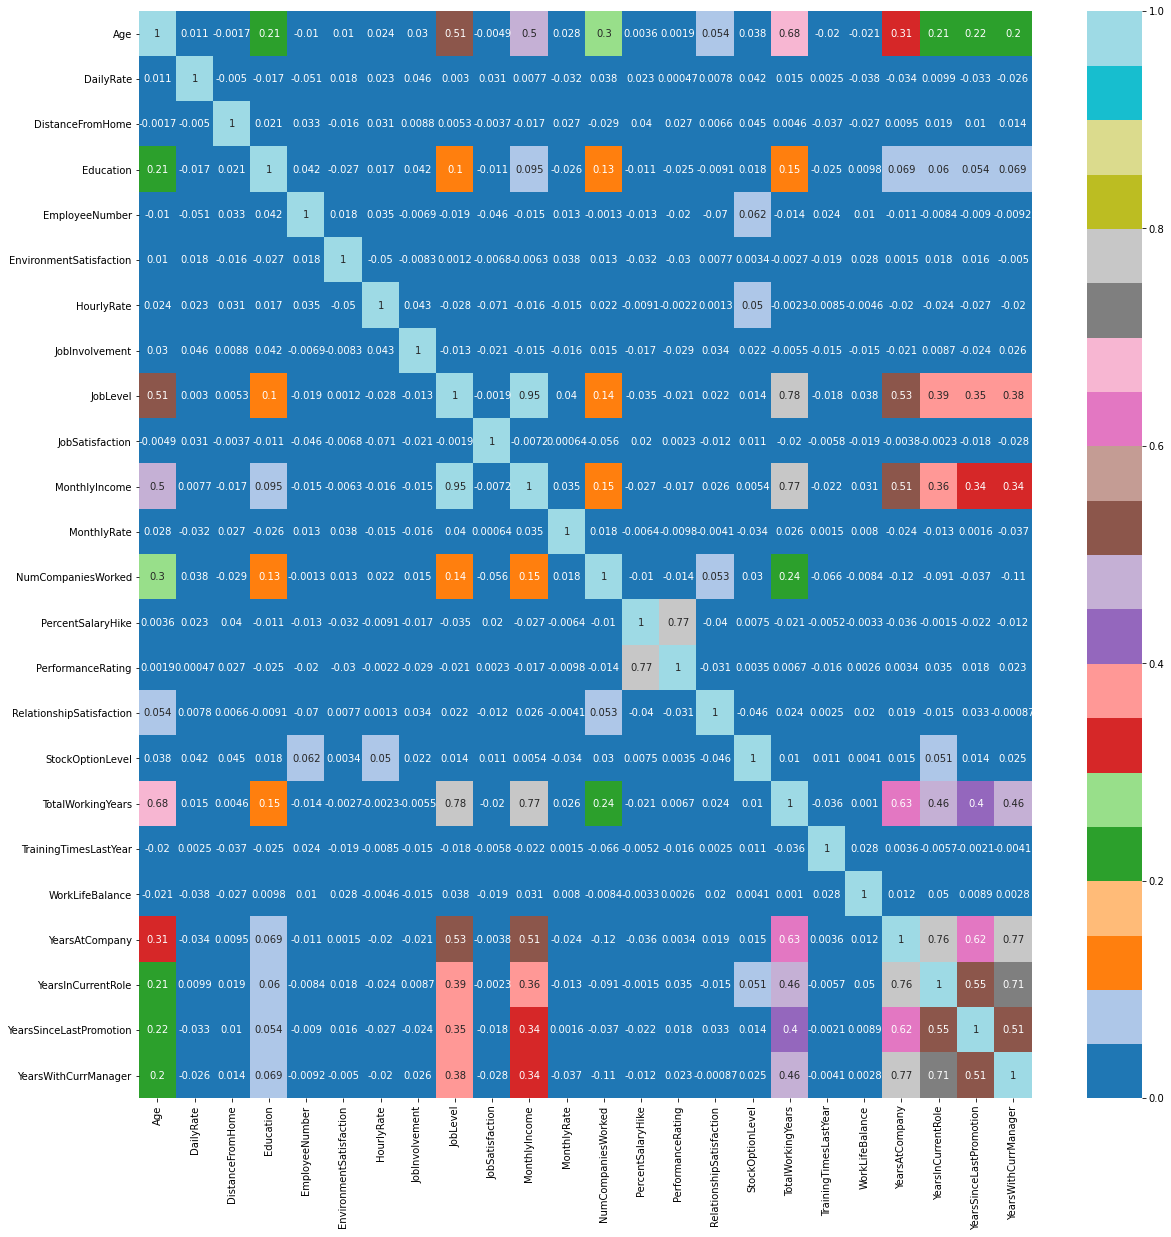

In [320]:
plt.figure(figsize=(20,20))
sns.heatmap(n_d.corr(),vmin=0,vmax=1,annot=True,cmap='tab20')

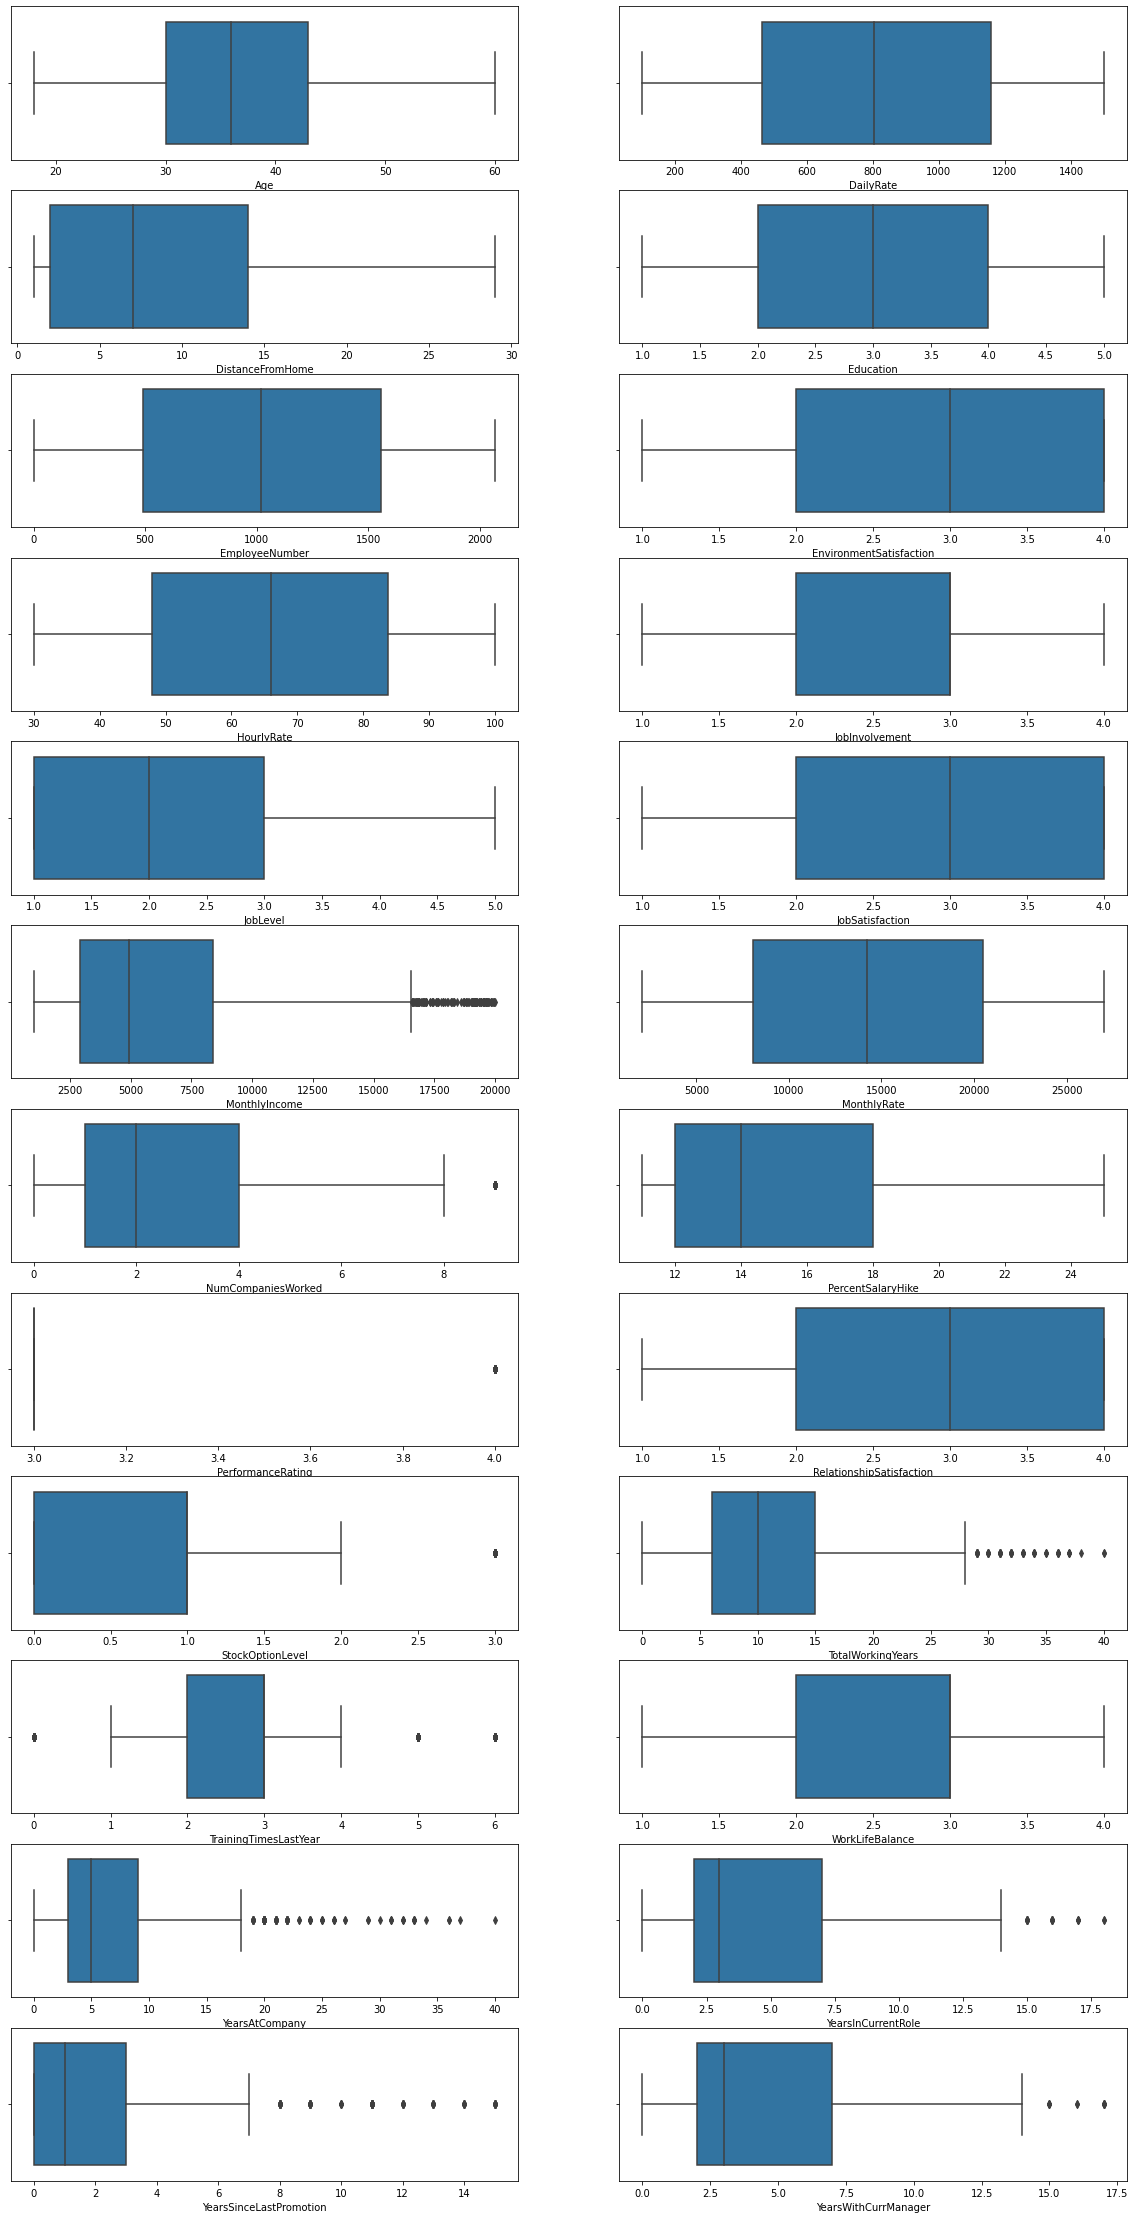

In [321]:
fig,ax = plt.subplots(12,2,figsize=(20,40))
for j , subplot in zip(n_d.columns,ax.flatten()):
  sns.boxplot(n_d[j],ax=subplot)

In [322]:
c_d.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [323]:
for k in c_d.columns:
  print(c_d[k].unique())


['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Y']
['Yes' 'No']


In [324]:
for l in c_d.columns:
  print(c_d[l].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Male      882
Female    588
Name: Gender, dtype: int64
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
Y    1470
Name: Over18, dtype: int64
No     1054
Yes     416
Name: Over

In [325]:
y = c_d['Attrition']

In [326]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [327]:
c_d.drop(['Attrition'],axis=1,inplace=True)

In [328]:
c_d.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [329]:
c_d.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

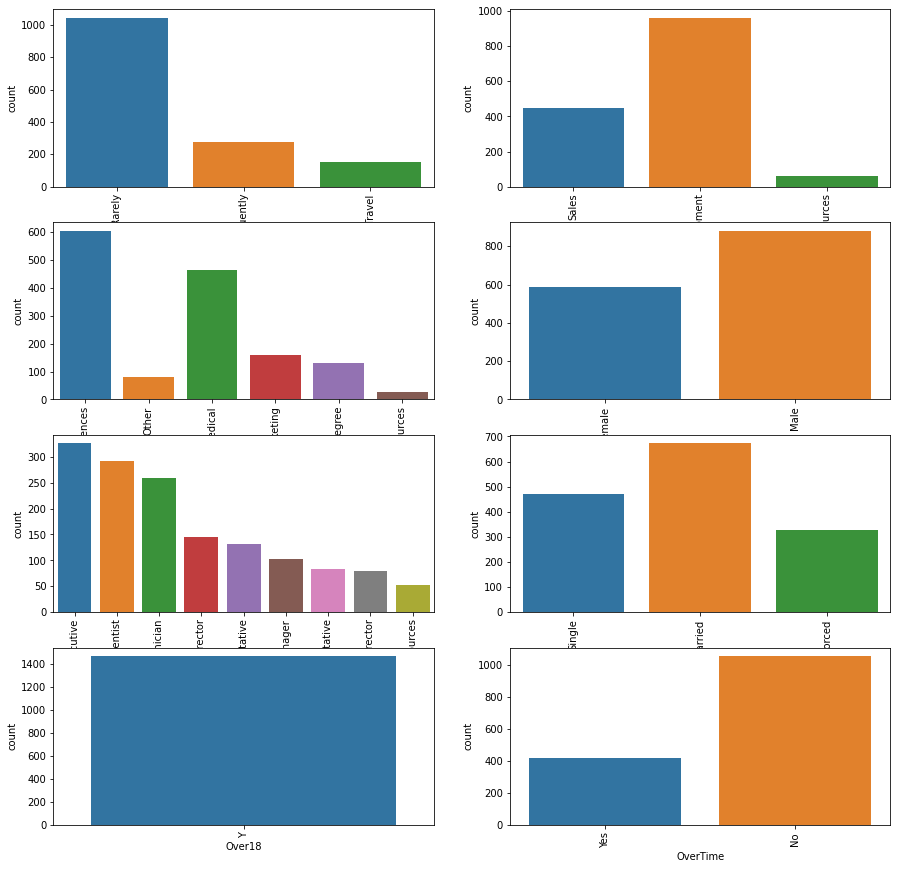

In [330]:
fig , ax = plt.subplots(4,2,figsize=(15,15))
for k,subplot in zip(c_d.columns,ax.flatten()):
    sns.countplot(c_d[k],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
    

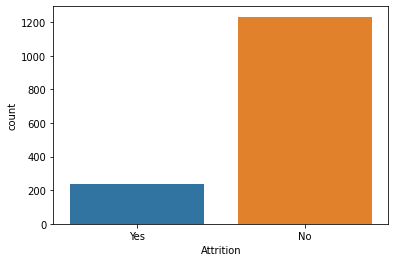

In [331]:
sns.countplot(y)

In [332]:
from sklearn.preprocessing import LabelEncoder
one = LabelEncoder()

In [333]:
y = one.fit_transform(y)

In [334]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [335]:
from scipy.stats import pearsonr

In [336]:
corr = []
for i in n_d.columns:
    x = pearsonr(n_d[i],y)
    corr.append(x)
    
corr

[(-0.15920500686577957, 8.356308021103691e-10),
 (-0.05665199186762928, 0.02985816066026647),
 (0.07792358295570374, 0.0027930600802134964),
 (-0.031372819640049183, 0.2293152033223197),
 (-0.01057724275924316, 0.6853275897296864),
 (-0.10336897833793601, 7.172338549369276e-05),
 (-0.006845549572139847, 0.7931347689944916),
 (-0.13001595678605338, 5.677065356744613e-07),
 (-0.16910475093102745, 6.795384780015446e-11),
 (-0.1034811260690214, 7.04306674173174e-05),
 (-0.15983958238498874, 7.147363985353496e-10),
 (0.015170212530471464, 0.5611235982242344),
 (0.043493739057813625, 0.09552526205651818),
 (-0.013478202057439092, 0.6056128238894216),
 (0.0028887517110808302, 0.9118840421070497),
 (-0.045872278881126695, 0.07871363048466119),
 (-0.13714491893332553, 1.301014966001892e-07),
 (-0.17106324613622645, 4.061878111266784e-11),
 (-0.05947779855642055, 0.022578499737200376),
 (-0.06393904721740903, 0.01421105498902174),
 (-0.13439221398997728, 2.3188716103862327e-07),
 (-0.16054500426

In [337]:
con_arr = np.array(corr)
pvalue =  pd.Series(con_arr[:,1],index = n_d.columns).sort_values(ascending = False)
pvalue

PerformanceRating           9.118840e-01
HourlyRate                  7.931348e-01
EmployeeNumber              6.853276e-01
PercentSalaryHike           6.056128e-01
MonthlyRate                 5.611236e-01
Education                   2.293152e-01
YearsSinceLastPromotion     2.057900e-01
NumCompaniesWorked          9.552526e-02
RelationshipSatisfaction    7.871363e-02
DailyRate                   2.985816e-02
TrainingTimesLastYear       2.257850e-02
WorkLifeBalance             1.421105e-02
DistanceFromHome            2.793060e-03
EnvironmentSatisfaction     7.172339e-05
JobSatisfaction             7.043067e-05
JobInvolvement              5.677065e-07
YearsAtCompany              2.318872e-07
StockOptionLevel            1.301015e-07
YearsWithCurrManager        1.736987e-09
Age                         8.356308e-10
MonthlyIncome               7.147364e-10
YearsInCurrentRole          6.003186e-10
JobLevel                    6.795385e-11
TotalWorkingYears           4.061878e-11
dtype: float64

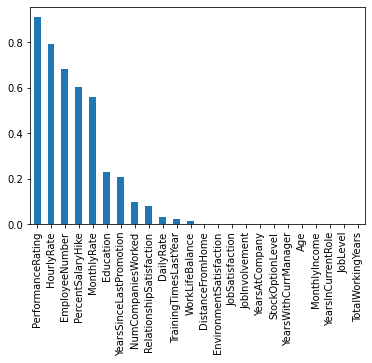

In [338]:
pvalue.plot.bar()

In [339]:
for h,l in enumerate(pvalue):
    if l > 0.05:
        print(h)
    
    

0
1
2
3
4
5
6
7
8


In [340]:
pvalue.index

Index(['PerformanceRating', 'HourlyRate', 'EmployeeNumber',
       'PercentSalaryHike', 'MonthlyRate', 'Education',
       'YearsSinceLastPromotion', 'NumCompaniesWorked',
       'RelationshipSatisfaction', 'DailyRate', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'JobInvolvement', 'YearsAtCompany',
       'StockOptionLevel', 'YearsWithCurrManager', 'Age', 'MonthlyIncome',
       'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears'],
      dtype='object')

In [341]:
n_d.drop(['PerformanceRating', 'HourlyRate', 'EmployeeNumber',
       'PercentSalaryHike', 'MonthlyRate', 'Education',
       'YearsSinceLastPromotion', 'NumCompaniesWorked',
       'RelationshipSatisfaction'],axis=1,inplace=True)

In [342]:
n_d.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1102,1,2,3,2,4,5993,0,8,0,1,6,4,5
1,49,279,8,3,2,2,2,5130,1,10,3,3,10,7,7
2,37,1373,2,4,2,1,3,2090,0,7,3,3,0,0,0
3,33,1392,3,4,3,1,3,2909,0,8,3,3,8,7,0
4,27,591,2,1,3,1,2,3468,1,6,3,3,2,2,2


In [343]:
c_d.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [344]:
business = pd.get_dummies(c_d['BusinessTravel'])
Gender = pd.get_dummies(c_d['Gender'])
Jobrole = pd.get_dummies(c_d['JobRole'])
MaritalStatus = pd.get_dummies(c_d['MaritalStatus'])
Over18 = pd.get_dummies(c_d['Over18'])
OverTime = pd.get_dummies(c_d['OverTime'])



In [345]:
c_d.drop(['BusinessTravel','Gender','JobRole','MaritalStatus','Over18','OverTime'],axis=1,inplace=True)

In [346]:
c_d.head()

,Department,EducationField
0,Sales,Life Sciences
1,Research & Development,Life Sciences
2,Research & Development,Other
3,Research & Development,Life Sciences
4,Research & Development,Medical


In [347]:
c_d = c_d.apply(one.fit_transform)

In [348]:
c_d.head()

,Department,EducationField
0,2,1
1,1,1
2,1,4
3,1,1
4,1,3


In [349]:
c_d_i = pd.concat([c_d,business,Gender,JobRole,MaritalStatus,Over18,OverTime],axis=1)

In [350]:
c_d_i

,Department,EducationField,Non-Travel,Travel_Frequently,Travel_Rarely,Female,Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Divorced,Married,Single,Y,No,Yes
0,2,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,1,4,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,1,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
1466,1,3,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1467,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
1468,2,3,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0


In [351]:
from sklearn.feature_selection import chi2

In [352]:
chi_scores= chi2(c_d_i,y)
chi_scores

(array([1.32929732e+00, 8.34911631e-01, 7.31793403e+00, 1.58166228e+01,
        1.04785690e+00, 7.65129816e-01, 5.10086544e-01, 8.29251836e+00,
        1.85975262e+00, 1.16994947e+01, 9.49613598e+00, 9.12658865e+00,
        1.09780098e+01, 1.52305445e-04, 4.47333341e-01, 3.42902680e+01,
        8.79442184e+00, 6.59758576e+00, 3.07716690e+01, 3.40841167e-30,
        2.51988119e+01, 6.38450667e+01]),
 array([2.48930264e-01, 3.60856114e-01, 6.82698483e-03, 6.97867071e-05,
        3.06001178e-01, 3.81727912e-01, 4.75101394e-01, 3.98087437e-03,
        1.72653355e-01, 6.25170742e-04, 2.05905062e-03, 2.51921027e-03,
        9.21993914e-04, 9.90153390e-01, 5.03604036e-01, 4.74749891e-09,
        3.02152987e-03, 1.02117140e-02, 2.90244568e-08, 1.00000000e+00,
        5.17140456e-07, 1.34598985e-15]))

In [353]:
pvalue=pd.Series(chi_scores[1],index=c_d_i.columns)
pvalue=pvalue.sort_values(ascending=False,inplace=False)
pvalue

Y                                    1.000000e+00
JobRole_Research Scientist           9.901534e-01
JobRole_Sales Executive              5.036040e-01
Male                                 4.751014e-01
Female                               3.817279e-01
EducationField                       3.608561e-01
Travel_Rarely                        3.060012e-01
Department                           2.489303e-01
JobRole_Human Resources              1.726534e-01
Married                              1.021171e-02
Non-Travel                           6.826985e-03
JobRole_Healthcare Representative    3.980874e-03
Divorced                             3.021530e-03
JobRole_Manufacturing Director       2.519210e-03
JobRole_Manager                      2.059051e-03
JobRole_Research Director            9.219939e-04
JobRole_Laboratory Technician        6.251707e-04
Travel_Frequently                    6.978671e-05
No                                   5.171405e-07
Single                               2.902446e-08


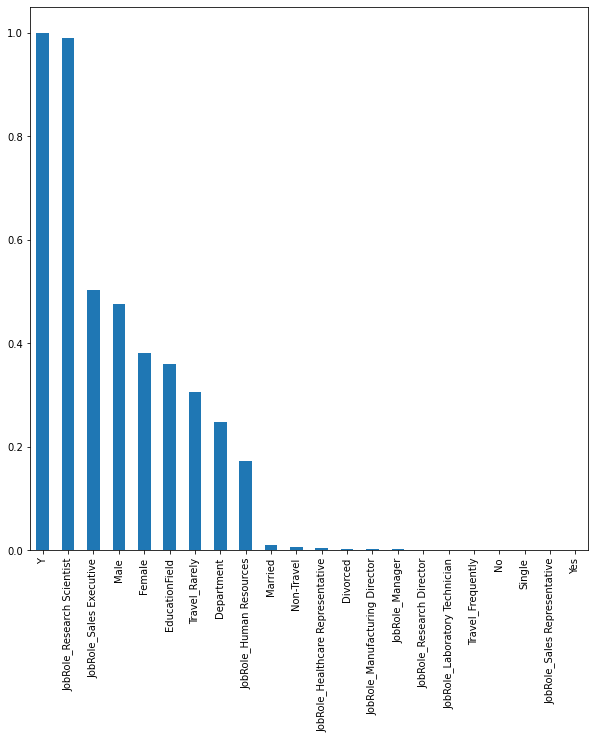

In [356]:
plt.figure(figsize=(10,10))
pvalue.plot.bar()

In [357]:
for h,o in enumerate(pvalue):
    if o > 0.05:
        print(h)
    
    

0
1
2
3
4
5
6
7
8


In [359]:
c_d_i.drop(['JobRole_Research Scientist','JobRole_Sales Executive','Male','Female','EducationField','Department','Travel_Rarely','JobRole_Human Resources'],axis=1,inplace=True)

In [360]:
c_d_i.columns

Index(['Non-Travel', 'Travel_Frequently', 'JobRole_Healthcare Representative',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Sales Representative', 'Divorced', 'Married', 'Single', 'Y',
       'No', 'Yes'],
      dtype='object')

In [362]:
X = pd.concat([n_d,c_d_i],axis=1)

In [363]:
X.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Non-Travel,Travel_Frequently,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,Divorced,Married,Single,Y,No,Yes
0,41,1102,1,2,3,2,4,5993,0,8,0,1,6,4,5,0,0,0,0,0,0,0,0,0,0,1,1,0,1
1,49,279,8,3,2,2,2,5130,1,10,3,3,10,7,7,0,1,0,0,0,0,0,0,0,1,0,1,1,0
2,37,1373,2,4,2,1,3,2090,0,7,3,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,3,1,3,2909,0,8,3,3,8,7,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
4,27,591,2,1,3,1,2,3468,1,6,3,3,2,2,2,0,0,0,1,0,0,0,0,0,1,0,1,1,0


In [366]:
n_d.shape


(1470, 15)

In [367]:
c_d_i.shape

(1470, 14)

In [368]:
X.shape

(1470, 29)

In [369]:
y.shape

(1470,)

In [370]:
from sklearn.model_selection import train_test_split

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=2)

In [372]:
X_train.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Non-Travel,Travel_Frequently,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,Divorced,Married,Single,Y,No,Yes
568,55,725,2,4,3,5,1,19859,1,24,2,3,5,2,4,0,0,0,0,1,0,0,0,0,1,0,1,0,1
1129,42,1059,9,4,2,5,4,19613,0,24,2,3,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0
391,40,555,2,2,2,2,3,3448,1,20,3,3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
1263,42,855,12,2,3,1,2,2766,3,7,6,2,5,3,4,0,0,0,1,0,0,0,0,1,0,0,1,1,0
116,34,1354,5,3,2,3,1,11631,0,14,6,3,11,10,8,0,0,0,0,1,0,0,0,0,0,1,1,1,0


In [374]:
X_test.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Non-Travel,Travel_Frequently,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,Divorced,Married,Single,Y,No,Yes
721,50,939,24,4,3,4,3,13973,1,22,2,3,12,11,5,0,0,0,0,0,1,0,0,0,1,0,1,0,1
843,26,1384,3,1,4,1,4,4420,1,8,2,3,8,7,7,0,0,0,1,0,0,0,0,0,1,0,1,1,0
627,52,890,25,3,2,4,4,13826,0,31,3,3,9,8,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0
1368,34,735,22,3,2,2,4,5747,0,16,3,3,15,10,11,0,1,0,0,0,0,0,0,0,1,0,1,0,1
305,36,1105,24,2,3,2,2,5674,1,11,3,3,9,8,8,1,0,0,1,0,0,0,0,0,1,0,1,1,0


In [376]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [377]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [378]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [379]:
log = LogisticRegression()
svc = SVC()
ran = RandomForestClassifier()
dec = DecisionTreeClassifier()

In [380]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [382]:
log.score(X_train,y_train)

0.8415937803692906

In [383]:
log.score(X_test,y_test)

0.8435374149659864

In [384]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [385]:
svc.score(X_train,y_train)

0.8386783284742468

In [386]:
svc.score(X_test,y_test)

0.8390022675736961

In [387]:
ran.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [388]:
ran.score(X_train,y_train)

1.0

In [389]:
ran.score(X_test,y_test)

0.8684807256235828

In [390]:
dec.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [392]:
dec.score(X_train,y_train)

1.0

In [391]:
dec.score(X_test,y_test)

0.7936507936507936

In [393]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)   #y_train.ravel() 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 166
Before OverSampling, counts of label '0': 863 

After OverSampling, the shape of train_X: (1726, 29)
After OverSampling, the shape of train_y: (1726,) 

After OverSampling, counts of label '1': 863
After OverSampling, counts of label '0': 863


In [394]:
log.fit(X_train_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [398]:
log.score(X_train_res,y_train_res)

0.7410196987253765

In [395]:
log.score(X_test,y_test)

0.6621315192743764

In [396]:
svc.fit(X_train_res,y_train_res)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [397]:
svc.score(X_test,y_test)

0.6961451247165533

In [399]:
y_test_pred = ran.predict(X_test)

In [400]:
from sklearn.metrics import classification_report

In [401]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       370
           1       0.72      0.30      0.42        71

    accuracy                           0.87       441
   macro avg       0.80      0.64      0.67       441
weighted avg       0.85      0.87      0.84       441

